# Official Data

In [1]:
import os
os.chdir("../../")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.tsa.ts_utils import *

## Official and Aviation (Seats Arrivals) from 2019

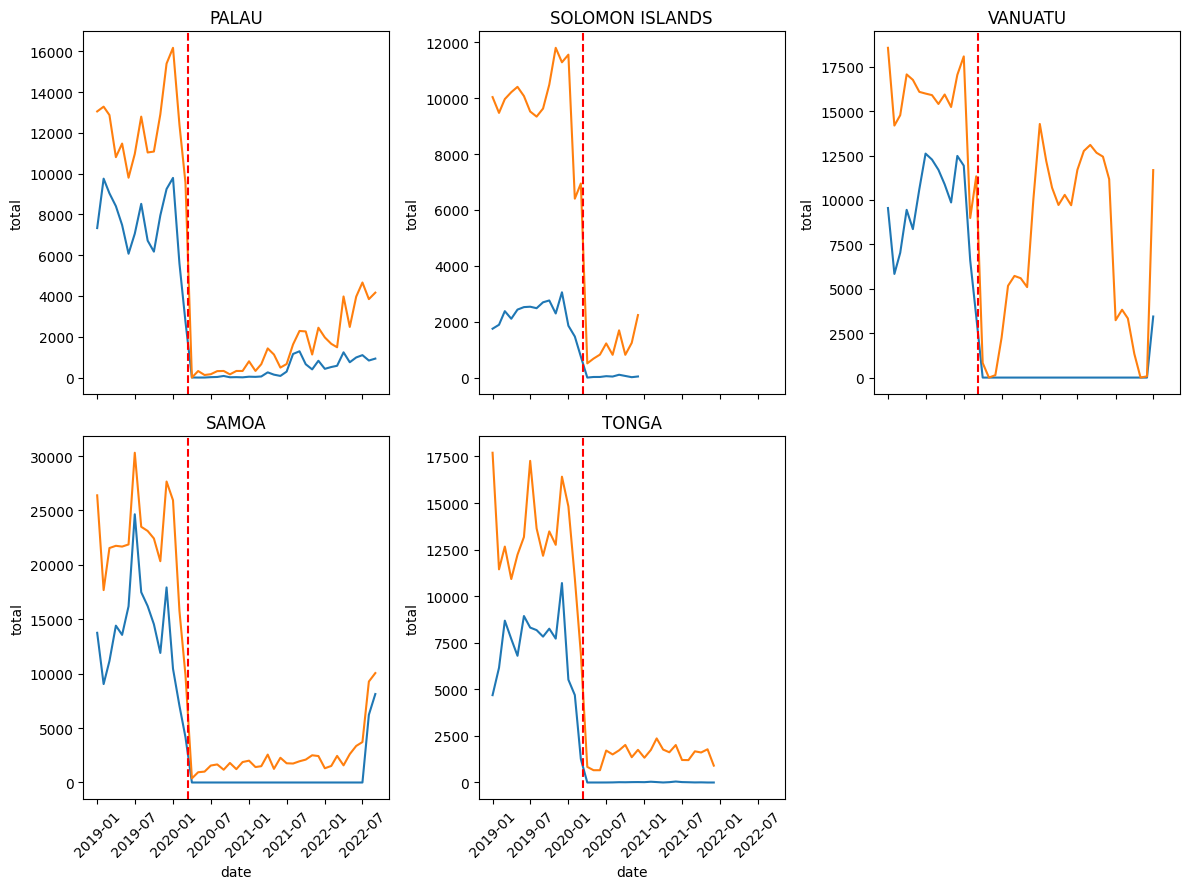

In [2]:
def process_data(path):
    df = pd.read_csv(path).drop("Unnamed: 0", axis=1)
    df.columns = [col.lower() for col in df.columns]
    if "date" not in df.columns:
        df["date"] = [
            str(int(y)) + "-" + str(int(m)) for y, m in zip(df.year, df.month)
        ]
    df["date"] = pd.to_datetime(df["date"])

    return df


def draw_plot(df, country, ax):
    temp = df[["date", "total", "seats_arrivals_total"]]
    sns.lineplot(x="date", y="total", data=temp, ax=ax)
    sns.lineplot(x="date", y="seats_arrivals_total", data=temp, ax=ax)
    ax.axvline(pd.Timestamp(2020, 3, 11), color="r", linestyle="--")
    ax.set_title(str(country).upper().replace("_", " "))
    ax.tick_params(axis='x', rotation=45)
    return ax


countries = ["palau", "solomon_islands", "vanuatu", "samoa", "tonga"]
fig, ax = plt.subplots(2, 3, figsize=(12, 9), sharex=True)
for idx, country in enumerate(countries):
    path = os.getcwd() + "/data/tourism/" + str(country) + \
        "/intermediate/" + str(country) + "_merged.csv"
    data = process_data(path)
    draw_plot(data, country, ax[idx // 3, idx % 3])
ax[1, 2].remove()
plt.tight_layout()
plt.show()

## Stationarity Table for Official Statistics

In [3]:
adf_dfs = pd.DataFrame()
for country in countries:
    path = os.getcwd() + "/data/tourism/" + str(country) + \
        "/intermediate/" + str(country) + "_monthly_visitor.csv"
    data = process_data(path)
    adf_df = pd.DataFrame(adf_test(data["total"]), columns=[country.upper().replace("_", "")]).T
    adf_dfs = pd.concat([adf_dfs, adf_df], axis=0)
    
display(adf_dfs)

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
PALAU,-1.230261,0.660444,13.0,170.0,-3.469413,-2.878696,-2.575917
SOLOMONISLANDS,-2.602577,0.092466,3.0,140.0,-3.477945,-2.882416,-2.577902
VANUATU,-2.425354,0.134708,13.0,211.0,-3.461727,-2.875337,-2.574124
SAMOA,-3.403589,0.010837,14.0,227.0,-3.459490,-2.874358,-2.573602
TONGA,-2.094926,0.246560,14.0,129.0,-3.482088,-2.884219,-2.578864
